# DeepFake Detection with CNN 

In [7]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [8]:
# dataset directories
train_dir = "archive/data/train"
test_dir = "archive/data/test"

# Image parameters
img_width, img_height = 224, 224
batch_size = 32

# Define the number of classes (real and fake)
num_classes = 2

# Calculate the number of training and testing samples separately for real and fake images
num_train_real_samples = len(os.listdir(os.path.join(train_dir, 'real')))
num_train_fake_samples = len(os.listdir(os.path.join(train_dir, 'fake')))

num_test_real_samples = len(os.listdir(os.path.join(test_dir, 'real')))
num_test_fake_samples = len(os.listdir(os.path.join(test_dir, 'fake')))

# Calculate the total number of training and testing samples
num_train_samples = num_train_real_samples + num_train_fake_samples
num_test_samples = num_test_real_samples + num_test_fake_samples



In [9]:
# Data preprocessing

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 11448 images belonging to 2 classes.
Found 3103 images belonging to 2 classes.


In [10]:
model = keras.Sequential()

# Add convolutional layers
model.add(layers.Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Add fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))


In [11]:

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
    run_eagerly=True
)


In [26]:
history = model.fit(
    train_generator,
    steps_per_epoch=num_train_samples // batch_size,
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=test_generator,
    validation_steps=num_test_samples // batch_size
)


Epoch 1/10
357/357 [==============================] - 815s 2s/step - loss: 0.7621 - accuracy: 0.5255 - val_loss: 0.6944 - val_accuracy: 0.5052
Epoch 2/10
357/357 [==============================] - 731s 2s/step - loss: 0.6929 - accuracy: 0.5076 - val_loss: 0.6766 - val_accuracy: 0.5352
Epoch 3/10
357/357 [==============================] - 739s 2s/step - loss: 0.6963 - accuracy: 0.5179 - val_loss: 0.6932 - val_accuracy: 0.5010
Epoch 4/10
357/357 [==============================] - 785s 2s/step - loss: 0.6938 - accuracy: 0.5188 - val_loss: 0.6935 - val_accuracy: 0.4954
Epoch 5/10
357/357 [==============================] - 797s 2s/step - loss: 0.6929 - accuracy: 0.5078 - val_loss: 0.6935 - val_accuracy: 0.4954
Epoch 6/10
357/357 [==============================] - 718s 2s/step - loss: 0.6900 - accuracy: 0.5298 - val_loss: 0.6837 - val_accuracy: 0.5583
Epoch 7/10
357/357 [==============================] - 733s 2s/step - loss: 0.6868 - accuracy: 0.5424 - val_loss: 0.6673 - val_accuracy: 0.5902

In [27]:
accuracy = model.evaluate(test_generator)
print(f"Accuracy: {accuracy[1]*100:.2f}%")

97/97 [==============================] - 46s 463ms/step - loss: 0.7070 - accuracy: 0.6101
Accuracy: 61.01%


# Increase epoch num to increase model performance 

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=num_train_samples // batch_size,
    epochs=30,  # Adjust the number of epochs as needed
    validation_data=test_generator,
    validation_steps=num_test_samples // batch_size
)


Epoch 1/30
357/357 [==============================] - 660s 2s/step - loss: 0.7387 - accuracy: 0.5314 - val_loss: 0.6861 - val_accuracy: 0.5661
Epoch 2/30
357/357 [==============================] - 656s 2s/step - loss: 0.6721 - accuracy: 0.5799 - val_loss: 0.6240 - val_accuracy: 0.6608
Epoch 3/30
357/357 [==============================] - 646s 2s/step - loss: 0.6542 - accuracy: 0.6150 - val_loss: 0.5973 - val_accuracy: 0.6683
Epoch 4/30
357/357 [==============================] - 638s 2s/step - loss: 0.6825 - accuracy: 0.5720 - val_loss: 0.6638 - val_accuracy: 0.5990
Epoch 5/30
357/357 [==============================] - 638s 2s/step - loss: 0.6542 - accuracy: 0.6205 - val_loss: 0.5947 - val_accuracy: 0.6797
Epoch 6/30
357/357 [==============================] - 802s 2s/step - loss: 0.6279 - accuracy: 0.6513 - val_loss: 0.6739 - val_accuracy: 0.6387
Epoch 7/30
357/357 [==============================] - 694s 2s/step - loss: 0.6350 - accuracy: 0.6383 - val_loss: 0.6223 - val_accuracy: 0.6250

In [42]:
# print final accuracy
accuracy = model.evaluate(test_generator)
print(f"Accuracy: {accuracy[1]*100:.2f}%")

97/97 [==============================] - 40s 407ms/step - loss: 0.7163 - accuracy: 0.6626
Accuracy: 66.26%


1/1 [==============================] - 1s 924ms/step


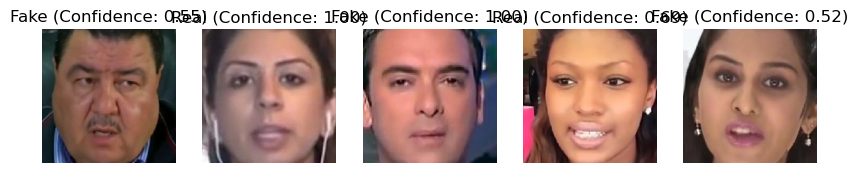

1/1 [==============================] - 1s 537ms/step


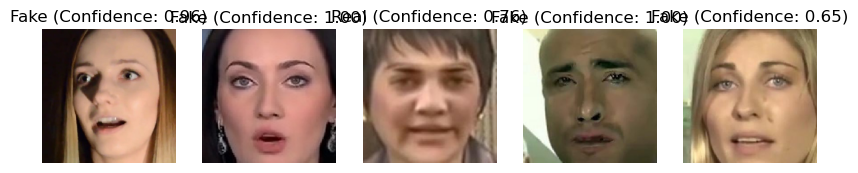

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot images
def plot_images(images, titles):
    plt.figure(figsize=(10, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Function to get predictions
def get_predictions(generator, model):
    images = []
    titles = []
    
    for _ in range(len(generator)):
        batch = generator.next()
        image_batch, labels_batch = batch
        predictions = model.predict(image_batch)
        
        for i in range(len(predictions)):
            is_real = np.argmax(predictions[i]) == 0
            if is_real:
                images.append(image_batch[i])
                titles.append(f"Real (Confidence: {predictions[i][0]:.2f})")
            else:
                images.append(image_batch[i])
                titles.append(f"Fake (Confidence: {predictions[i][1]:.2f})")

    return images, titles

# Get predictions for real and fake images
real_images, real_titles = get_predictions(test_generator, model)

# Plot real images that the model predicts as real
plot_images(real_images[:5], real_titles[:5])

# Get predictions for fake images
test_generator.reset()  # Reset the generator to the beginning
fake_images, fake_titles = get_predictions(test_generator, model)

# Plot fake images that the model predicts as fake
plot_images(fake_images[:5], fake_titles[:5])
